# **Optimasi Portofolio dengan Metode PSO**

Kelompok 10:
1.   Josevine Gabriela Wijanarko	(22/493339/PA/21180)
2.   Meila Dwi Nurini	(22/497250/PA/21408)
3. Daffa Elgo Santosa	(22/503591/PA/21647)

# Metodologi

## Portofolio

Portofolio merupakan kumpulan aset yang banyak dipilih investor untuk mendapatkan keuntungan. Teori portofolio berkaitan dengan estimasi investor terhadap risiko dan return yang diukur secara statistik untuk membuat portofolio investasinya. Teori portofolio dimulai dengan asumsi bahwa tingkat pengembalian atas sekuritas dimasa depan dapat diestimasi dan kemudian dapat menentukan risiko dengan variasi distribusi (Nadiva, 2016).

## Optimasi Portofolio

Menurut Jogiyanto (2009), portofolio optimal adalah portofolio dengan kombinasi return ekspetasian dan risiko terbaik. Portofolio yang optimal dipilih dari berbagai portofolio-portofolio effisien yang berada di *efficient frontier*. Portofolio yang dipilih investor merupakan portofolio yang sesuai dengan preferensi investor terhadap return atau risiko yang bersedia ditanggung. Menurut Sharpe, William (1997) Efficient frontier dapat ditentukan dengan menerapkan teorema efisiensi set *efficient set theorem* yang menyatakan bahwa investor akan memilih portofolio optimal dari sejumlah portofolio yang menawarkan return ekspetarian maksimum untuk berbagai tingkat risiko dan menawarkan risiko yang minimum untuk berbagai tingkat return ekspetarian.

## Particle Swarm Optimization (PSO)

Metode Particle Swarm Optimization (PSO) pertama kali dikenalkan oleh Dr. Eberhart dan Dr. Kennedy tahun 1995 pada konferensi jaringan syaraf di Australia. Metode ini berupa optimasi stokastik terhadap suatu populasi. PSO dalam sains komputasi merupaka metode yang mengoptimasi masalah dengan mencoba meningkatkan calon solusi dari masalah secara berulang-ulang dengan memperhatikan ukuran kualitas yang diberikan.

PSO terinspirasi dari perilaku alamiah kawanan hewan, seperti burung yang mencari makanan atau serangga yang bekerja bersama untuk mencapai tujuan. Misalnya, sekelompok burung yang mencari makanan di suatu daerah yang tidak diketahui secara pasti, tetapi mereka bisa menilai jarak dari makanan tersebut. Salah satu strategi efektif adalah dengan mengikuti burung yang paling dekat dengan makanan.

PSO memecahkan masalah optimasi dengan cara menginisialisasi sekelompok partikel, yang masing-masing merupakan calon solusi untuk masalah tersebut. Partikel-partikel ini bergerak melalui ruang pencarian berdasarkan posisi dan kecepatannya, serta selalu mengacu pada solusi terbaik yang sudah ditemukan baik oleh partikel itu sendiri maupun oleh seluruh populasi (Rini Widia, 2018).


## Algoritma PSO

Algoritma *Particle Swarm  Optimization* sebagai berikut (Rini Widia, 2018):


1.   Inisialisasi sekumpulan partikel (𝒙ₖⁱ) secara random (setiap partikel merepresentasikan solusi yang mungkin untuk masalah optimasi).
2.   Inisialiasi kecepatan dari setiap partikel (𝒱ₖⁱ) dengan asumsi bahwa kecepatan awal partikel = 0.
3. Evaluasi fungsi tujuan (𝑓ₖⁱ).
4. Menentukan posisi terbaik masing-masing partikel untuk setiap iterasi (𝒑ₖⁱ) dengan ketentuan jika 𝑓ₖⁱ <= 𝑓ⁱ_best maka 𝑓ⁱ_best = 𝑓ₖⁱ, 𝒑ₖⁱ = 𝒙ₖⁱ.
5. Menentukan posisi terbaik untuk setiap populasi (𝒑ₖᵍ) dengan ketentuan jika 𝑓ₖⁱ <= 𝑓ᵍ_best maka 𝑓ᵍ_best = 𝑓ₖⁱ, 𝒑ₖᵍ = 𝒙ₖⁱ.
6. Memperbarui posisi dan kecepatan partikel.
7. Pemberhentian iterasi jika telah mencapai nilai optimum atau mencapai iterasi maksimum.

# Deskripsi Dataset

In [ ]:
# PACKAGES
# -----------------------------------------------------------------------------
import pandas   as pd
import numpy    as np
import datetime as dt
import matplotlib.pyplot as plt

In [ ]:
# =============================================================================
# INPUT PARAMETERS
# =============================================================================

# Date range for stock & t-bill data pull - default last 10 years
maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=365) # Min date to pull from

# List of stock tickers from the image
StockTickers = ['ACES.JK', 'ADRO.JK', 'AKRA.JK', 'AMRT.JK', 'ANTM.JK', 'ARTO.JK', 'ASII.JK',
                'BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'BRPT.JK', 'BUKA.JK', 'CPIN.JK',
                'GOTO.JK', 'ICBP.JK', 'INCO.JK', 'INDF.JK', 'INKP.JK', 'ITMG.JK', 'KLBF.JK',
                'MDKA.JK', 'MEDC.JK', 'PGAS.JK', 'PGEO.JK', 'PTBA.JK', 'SMGR.JK', 'TLKM.JK',
                'UNTR.JK', 'UNVR.JK']


# Rest of the parameters remain the same
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimize 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name


# Hasil dan Pembahasan

In [ ]:
# Helper Inputs
# -----------------------------------------------------------------------------

MONTHS_IN_YEAR = 12 # The number of months in a year

# bounds for evaluation Function search space
lowerBound        = 0   # no weight in a stock
upperBound        = 1   # Max weight in stock

In [ ]:
# =============================================================================
# Import stocks (monthly)
# =============================================================================

from StockPull import * # to pull in stock data


# Pull in data based on input parameters (Stock tickers, date range)
RawStockData = pullStockData(StockTickers, minDate, maxDate)

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock',  values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')


# =============================================================================
# Import T-Bill (monthly)
# T-Bill Ref: https://finance.yahoo.com/quote/%5EIRX/history/
# =============================================================================

# Get the average risk free rate
T_Bill = pullStockData(['^JK3M'], minDate, maxDate)

# Get the annualized average t-bill rate over date range
# Need over date range to get risk adjusted returns (Sharpe Ratio)
riskFreeRate = T_Bill['adjClose'].mean() / 100 # 100%

[*********************100%***********************]  1 of 1 completed


/content/StockPull.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['^JK3M']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [ ]:
# =============================================================================
# INPUT PARAMETERS
# =============================================================================

# Date range for stock & t-bill data pull - default last year (365 days)
maxDate = dt.datetime.now()                     # Max date to pull from
minDate = maxDate - dt.timedelta(days=365)      # Min date to pull from

# List of stock tickers from the image
StockTickers = ['ACES.JK', 'ADRO.JK', 'AKRA.JK', 'AMRT.JK', 'ANTM.JK', 'ARTO.JK', 'ASII.JK',
                'BBCA.JK', 'BBNI.JK', 'BBRI.JK', 'BMRI.JK', 'BRPT.JK', 'BUKA.JK', 'CPIN.JK',
                'GOTO.JK', 'ICBP.JK', 'INCO.JK', 'INDF.JK', 'INKP.JK', 'ITMG.JK', 'KLBF.JK',
                'MDKA.JK', 'MEDC.JK', 'PGAS.JK', 'PGEO.JK', 'PTBA.JK', 'SMGR.JK', 'TLKM.JK',
                'UNTR.JK', 'UNVR.JK']

# Rest of the parameters remain the same
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
evalGoal         = 'risk'    # Minimize 'risk' or maximize 'sharpe'
minDesiredReturn = 0.075     # meet the minimum desired return. E.g. 7.5%
numPorfolios     = 30        # number of portfolios in swarm to simulate
method           = 'local'   # 'local' or 'global' best function name

# Helper Inputs
# -----------------------------------------------------------------------------
MONTHS_IN_YEAR = 12 # The number of months in a year

# bounds for evaluation Function search space
lowerBound        = 0   # no weight in a stock
upperBound        = 1   # Max weight in stock

# =============================================================================
# Import stocks (daily data)
# =============================================================================

from StockPull import *  # Assuming this is custom function to pull in stock data

# Pull in data based on input parameters (Stock tickers, date range), with daily frequency
RawStockData = pullStockData(StockTickers, minDate, maxDate, interval="1d")

# Pivot so that each stock is its own column
RawStockDataPivot = RawStockData.copy().pivot(index='period', columns='stock', values='adjClose')
RawStockDataPivot.to_csv('RawStockDataPivot.csv')

# # =============================================================================
# # Import T-Bill (daily data)
# # =============================================================================

# # Replace '^IRX' with the correct risk-free rate, e.g., '^JK3M' for Indonesian 3-month T-Bill if available
# T_Bill = pullStockData(['^JK3M'], minDate, maxDate, interval="1d")

# # Get the annualized average T-bill rate over the date range
# # Need this to calculate risk-adjusted returns (Sharpe Ratio)
# riskFreeRate = T_Bill['adjClose'].mean() / 100  # 100% scale


[*********************100%***********************]  1 of 1 completed


/content/StockPull.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PulledStocks = pd.concat([PulledStocks, stockTicker])
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed

In [ ]:
import inspect

# Get the stock pull function source code
stockPullFunction = inspect.getsource(pullStockData)

# Note the code to import the stock data:
print(stockPullFunction)

def pullStockData(StockTickers, minDate, maxDate, interval='1mo'):
    
    # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
    
    # Can dowload the following:
    # "Stock", "Open", "High", "Low", "Close", "Adj Close", "Volume"
    stockMetrics = ["Adj Close"]
    
    # Create df to hold the stocks pulled
    PulledStocks = pd.DataFrame(columns = stockMetrics)

    count = 0
    outOf = len(StockTickers)
    
    # Pull each stocks
    for stock in StockTickers:  
        
        count += 1 # Keep track
        
        # Get the stock ticker over the date range
        print('\nDownloading', stock, '- Progress:', count, '/', outOf)
        stockTicker = yf.download(stock, start=minDate, end=maxDate, 
                                  interval=interval)
        
        # Force reset to coerce to date
        stockTicker = stockTicker.reset_index()
        
        # Assign the ticker name to the stock
        stockTicker["Stock"] = stock
        
        # Concat

In [ ]:
# =============================================================================
# Manipulate stock data
# Create Returns, ExcessReturns, and ExpectedReturns data frames
# Using section 10.2 of Financial Modeling, 4th ed., Benninga
#
# df Percent change pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html
# Group by & mean pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
# Transposing: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transpose.html
# Matrix Multiplication: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dot.html
# =============================================================================


# 1. Get the percent return for each stock, for each period
# -- Calculation: Returns = This period return divided by last period minus 1, for each stock
# -----------------------------------------------------------------------------

# Create a data frame for the returns using raw data
Returns = RawStockDataPivot.copy()

# % Return = Percent change from last period to period + 1
# Also, Remove the na for the first periods
Returns = Returns.pct_change().dropna()


# 2. Get the Expected Return for each stock
# -- Calculation: ExpectedReturn = mean(Returns), for each stock
# -----------------------------------------------------------------------------

# Using the Returns data
ExpectedReturns = Returns.copy()

# Group by all periods and get the mean
ExpectedReturns['AllPeriods'] = 'AllPeriods'
ExpectedReturns = ExpectedReturns.groupby('AllPeriods').mean()


# 3. Calculate the Excess Returns for each stock and month
# -- Calculation: ExcessReturns = Returns - ExpectedReturns, for each stock
# -----------------------------------------------------------------------------

ExcessReturns = Returns.copy() - np.array(ExpectedReturns)


# 4. Variance-Covariance Matrix
# -- Calculation: ( t(ExcessReturns) * ExcessReturns ) / ( numPeriods - 1 )
# -----------------------------------------------------------------------------

# Number of periods in sample
numPeriods = len(ExcessReturns.index)

# Covariances between stocks (variance covariance matrix)
VarCov = ExcessReturns.transpose().dot(ExcessReturns) / ( numPeriods - 1 )

In [ ]:
# =============================================================================
# Functions to Evaluate Risk, Expected Return, and Sharpe Ratio
# -- Will be used when optimizing portfolio
# =============================================================================

# Function to Calculate the ExpectedReturn
# -- Calculation: expectedReturn = MONTH_IN_YEAR * ( Weights * t(ExpectedReturns) )
# -----------------------------------------------------------------------------
def evalExpectedReturn(MONTHS_IN_YEAR, Weights, ExpectedReturns):

    Weights = np.array(Weights)

    expectedReturn = MONTHS_IN_YEAR * ( Weights.dot( ExpectedReturns.transpose() ) )
    return expectedReturn[0]


# Function to Calculate the Risk
# -- Calculation: risk = sqrt(12) * sqrt( ( Weights * VarCov ) * t(Weights) )
# -----------------------------------------------------------------------------
def evalRisk(MONTHS_IN_YEAR, Weights, VarCov, ExpectedReturns, minDesiredReturn):

    # convert to numpy array
    Weights = np.array(Weights)

    # IF not the return desired then put a penalty on the portfolio
    # if evalExpectedReturn(MONTHS_IN_YEAR, Weights, ExpectedReturns) < minDesiredReturn:
    #     risk = 9999 # large penalty

    # # Else if desired return, then return actual risk
    # else:
    risk = np.sqrt(MONTHS_IN_YEAR) * np.sqrt( ( Weights.dot(VarCov) ).dot( Weights.transpose() ) )

    return risk


# Function to Calculate the SharpeRatio
# -- Calculation: (expectedReturn - riskFreeRate) / risk
# -----------------------------------------------------------------------------
def evalSharpeRatio(expectedReturn, riskFreeRate, risk):

    sharpeRatio = ( expectedReturn - riskFreeRate ) / risk
    return sharpeRatio

In [ ]:
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Use metaheuristics to solve for the optimal portfolio
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# =============================================1================================
# evaluation FUNCTION
# evaluation function to evaluate a real-valued solution x
# note: the feasible space is an n-dimensional hypercube centered at the origin with side length = 2 * 500
# =============================================================================
def evalFunction(Weights, evalGoal='risk'):

    # For every portfolio portfolio, calculate the fitness value based on evaluation function

    ## Calculate the risk
    risk = evalRisk(MONTHS_IN_YEAR, Weights, VarCov, ExpectedReturns, minDesiredReturn)

    ## Calculate the sharpe ratio
    sharpeRatio = evalExpectedReturn(MONTHS_IN_YEAR, Weights, ExpectedReturns)

    fitnessValue = 0 # initialize the output variable

    # Evaluate using the risk (minimize the risk of portfolio)
    if evalGoal == 'risk':
        fitnessValue = risk

    # Else use the sharpe ratio (maximize the sharpe ratio of portfolio):
    # Note changed signs because we want to dynamically maximize
    else:
        fitnessValue = -sharpeRatio

    return fitnessValue

# =============================================================================
# GLOBAL MIN VALUE AND POSITION SEARCH FUNCTION
# Returns the 2 element list (each containing a single value) with the global best portfolio's:
# ---- [0] min value and
# ---- [1] associate Weights of
# =============================================================================
def getGlobalBest(FitnessValues, Weights, numPorfolios):
    minValue = np.min(FitnessValues)         # Find the Minimum fitness value of all portfolios
    minIndex = FitnessValues.index(minValue) # Find the index of the Weights for the min. fit. value

    minPosition = Weights[minIndex][:] # Now get a copy of the portfolio's Weights with min index

    # Returns: the global best portfolio's minimum fitness value and its Weights
    return [minValue, minPosition]


# =============================================================================
# LOCAL MIN VALUE AND POSITION SEARCH FUNCTION
# Topology: Ring structure with n neighbors  (default 2)
# Returns the 2 element list of lists with the each portfolio's local best within neighborhood
# ---- [0] min value and
# ---- [1] associate Weights of
# Can change numStocksInNbrhd to consider more or less in portfolio's neighborhood
# =============================================================================
def getLocalBest(FitnessValues, Weights, numPorfolios,
                  numStocksInNbrhd = 2):  # Number of portfolios to compare to for local best

    lBestFitValue = [] # will hold the best VALUE    of the n surrounding portfolios, for each portfolio
    lBestPosition = [] # will hold the best POSITION of the n surrounding portfolios, for each portfolio


    # For every portfolio in the portfolio swarm, (starting at n less than index 0)
    for portfolio in range(-numStocksInNbrhd, numPorfolios - numStocksInNbrhd):

        # Identify the two neighbors fitness value of this portfolio,
        # which are the two precedng portfolios
        personalBestNeighbor1 = FitnessValues[portfolio]
        personalBestNeighbor2 = FitnessValues[portfolio + 1]

        # Identify the lowest fitness value of this portfolio's the two preciding neighbors
        minNeighValue = min(personalBestNeighbor1, personalBestNeighbor2)

        # Store the index of the portfolio
        minNeighIndex = FitnessValues.index(minNeighValue)

        # Store the portfolio's best neighbors fitness value and Weights
        lBestFitValue.append(FitnessValues[minNeighIndex])
        lBestPosition.append(Weights[minNeighIndex])

    # Returns a list of portfolios and the min of their n best fit. valued neighbors
    return[lBestFitValue, lBestPosition]


# If you needed to index the list just returned for global or local best
VALUE_IDX    = 0
POSITION_IDX = 1


# =============================================================================
# STEP 1 - SWARM INITIALIZATION / EVALUATION
# Randomly initialize a portfolio swarm instance
# Set the partical's best to it's starting Weights
# =============================================================================
def initializeSwarm(numPorfolios, numStocksInPort, functionToGetBest, evalGoal, absoluteMoveLimit):

    # In the current time period, Weights[portfolio] and Velocity[portfolio] of each portfolio i,
    Weights  = [] # to hold the portfolio weights
    Velocity = [] # to hold the portfolio velocities

    # Lists containing info related to each portfolio in portfolio swarm
    pCurrFitValue = []  # X[portfolio] The current Weights of portfolio i

    # For each portfolio and stock, randomly initialize the...
    for portfolio in range(numPorfolios):
        # for stock in range(numStocksInPort):

        # Create a random feasible solution
        randomValues = np.random.rand(numStocksInPort)
        randomWeights = randomValues / sum(randomValues)

        # Ensure that it is an initial feasible solution meeting return contraint
        while evalExpectedReturn(MONTHS_IN_YEAR, randomWeights, ExpectedReturns) < minDesiredReturn:
            randomValues = np.random.rand(numStocksInPort)
            randomWeights = randomValues / sum(randomValues)


        # Position: give random solution of weights summing to 1
        Weights.append(randomWeights)

        # Velocity: give random value between lower and upper bound
        Velocity.append(np.random.rand(numStocksInPort) * absoluteMoveLimit)

        # 1.1 - Evaluate fitness value
        pCurrFitValue.append(np.sum( evalFunction(Weights[:], evalGoal) ))  # evaluate the current Weights's fitness value

    # 1.2 - Log the individual and global bests
    pBestPosition = Weights[:]       # initialize pBestPosition to the starting Weights
    pBestFitValue = pCurrFitValue[:]  # initialize pBestPosition to the starting Weights's value


    # 1.3 - Log the Global or local best (depends on chosen method) fitness value and Weights
    glBestFitValue, glBestPosition = functionToGetBest(pBestFitValue[:], pBestPosition[:], numPorfolios)

    return [Weights, Velocity, pCurrFitValue,
            pBestPosition, pBestFitValue,
            glBestFitValue, glBestPosition]


# =============================================================================
# UPDATE VELOCITY AND POSITION
# =============================================================================
def updateVelocityAndWeights(intertiaWeight, Velocity, Weights, phi1, phi2, pBestPosition, glBestPosition,
                              numPorfolios, numStocksInPort, absoluteMoveLimit):
# Velocity --------------------------------------------------------------------

    ## random weights of r for random Velocity adjustment
    r1, r2 = np.random.rand(), np.random.rand()

    ## Calculations of updating Velocity, separated by
    ## intertia + cognitive + social (for simplicity)
    vInertia   = np.multiply(intertiaWeight, Velocity[:])                          # Interia   component of updated Velocity
    vCognitive = np.multiply(phi1*r1, np.subtract( pBestPosition[:], Weights[:])) # Cognitive component of ""
    vSocial    = np.multiply(phi2*r2, np.subtract(glBestPosition[:], Weights[:])) # Social    component of ""

    ## Update the new Velocity to the summation of intertia, cognitive, and social
    newVelocity =  vInertia[:] + vCognitive[:] + vSocial[:]

    ## Limit the Velocity between the upper and lower bound limits
    for portfolio in range(numPorfolios):
        for stock in range(numStocksInPort):

            # If the new Velocity of portfolio i is > the ub move limit, then reduce to the limit
            if newVelocity[portfolio][stock] > absoluteMoveLimit:
                newVelocity[portfolio][stock] = absoluteMoveLimit

            # If the new Velocity of portfolio i is < the limit, then increase to the limit
            if newVelocity[portfolio][stock] < -absoluteMoveLimit:
                newVelocity[portfolio][stock] = -absoluteMoveLimit

    # Position ----------------------------------------------------------------

    ## Update new Weights based on the updated Velocity
    newWeights = Weights[:] + newVelocity[:]


    ## Make sure that the Weights is within the bounds -----------------------

    # For each portfolio and stock
    for portfolio in range(numPorfolios):
        for stock in range(numStocksInPort):

            # Push the new Weights to lower bound if lower
            if newWeights[portfolio][stock] < lowerBound:
                newWeights[portfolio][stock] = lowerBound

            # Push the new Weights to upper bound if higher
            if newWeights[portfolio][stock] > upperBound:
                newWeights[portfolio][stock] = upperBound


    for portfolio in range(numPorfolios):

        # Balance the weights to equal 1.
        # Be sure to keep move limit close to 1
        newWeights[portfolio] = np.array(newWeights[portfolio]) / sum(newWeights[portfolio])


    # Convert Weights and Velocity back to list ------------------------------
    newWeights  = newWeights.tolist()
    newVelocity = newVelocity.tolist()

    return [newWeights, newVelocity]


# =============================================================================
# Compare current Weights fitness value to the current best (for each portfolio)
# =============================================================================
def calculatePortfolioBests(Weights, numPorfolios, numStocksInPort,
                           pCurrFitValue, pBestPosition, pBestFitValue, evalGoal):
    # Calculate the fitness of the new Weights
    for portfolio in range(numPorfolios):
        # for stock in range(numStocksInPort):

        # Get the current fitness value of the new Weights
        pCurrFitValue[portfolio] = evalFunction(Weights[:][portfolio], evalGoal)

        # Compare the current Weights' value to their person best
        if pCurrFitValue[portfolio] < pBestFitValue[portfolio]:

            # If better, then set the best VALUE to the current value (as a copy [:])
            pBestFitValue[portfolio] = pCurrFitValue[:][portfolio]

            # If better, then set the best POSITION to the current Weights  (as a copy [:])
            pBestPosition[portfolio] = Weights[:][portfolio]

    return [pCurrFitValue, pBestPosition, pBestFitValue]


# =============================================================================
# DISPLAY GLOBAL BEST AND DIMENSIONS FUNCTION
# Function for displaying the global best and its dimensions
# =============================================================================
def displayGlobalBest(glBestFitValue, glBestPosition, numStocksInPort,
                      printDims, StockTickers, expectedReturn,
                      riskFreeRate, evalGoal,
                      numPeriods=numPeriods,
                      MONTHS_IN_YEAR=MONTHS_IN_YEAR):

    # The sharpe ratio
    sharpeRatio = evalSharpeRatio(expectedReturn, riskFreeRate, glBestFitValue)

    # Total % return over the entire period
    monthsInSample = numPeriods/MONTHS_IN_YEAR # since on monthly basis
    returnOverPeriod = (1 + expectedReturn) ** monthsInSample

    # Flip signs if maximizing sharpe
    if evalGoal != 'risk':
        glBestFitValue = -glBestFitValue
        sharpeRatio    = -sharpeRatio

    # Print the global optima
    print('\n```')
    print('Key Summary Statistics -----------------')
    print(  'Global Best Annualized Risk:\t ' + str(round(100 * glBestFitValue, 1))  + '%')
    print(  'Annualized Expected Return:\t ' + str(round(100 * expectedReturn, 1))  + '%')
    print(  'Sharpe Ratio:\t\t\t% 0.2f' % sharpeRatio)
    print(  'Expected Return over', str(round(monthsInSample, 1) ), 'Years:  '
          + str(round(100 * returnOverPeriod, 1))  + '%')


    # Print each stock (if toggled)
    if printDims:
        print('\nGlobal best weights in each stock (Only includes stocks to invest in):')
        print('```')

        # Print the Weights of each stock in markdown table format
        print('| Ticker | Opt. Weight |', sep ='')
        print('|--------|-------------|')
        for stock in range(numStocksInPort):
            if glBestPosition[stock] > 0.001:
                print('|' + str(StockTickers[stock]).rjust(7, ' '),
                      '|' + '{:.1f}'.format(100 * round(glBestPosition[stock], 3) ).rjust(11, ' ') + '% |'
                      )


# =============================================================================
# Plot the optimal weights and prices performance
# =============================================================================
def plotOptimalPerformance(RawStockDataPivot, OptimalWeights):

    # Calculate the weighted prices using adj close prices and optimal weights
    OptimizedPrices = RawStockDataPivot.copy().dropna().dot(OptimalWeights.copy())

    # Create a plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    # Plot the weighted prices
    plt.plot(OptimizedPrices)

    # Labels
    ax.set_title("Wt.'d Monthly Adj. Close Price of Optimal Portfolio")
    ax.set_xlabel('Month of Year (Year Only Shown for Simplicity)')
    ax.set_ylabel('Weighted Adj. Close Price (USD)')


In [ ]:
# =============================================================================
# SWARM OPTIMIZATION FUNCTION
# Parameters:
# ---- evalGoal:        Minimize 'risk' or maximize 'sharpe' ratio
# ---- numPorfolios:    The number of portfolios within the portfolio swarm
# ---- intertiaWeight:  The weight assigned to the intertia component of the Velocity eq.
# ---- phi1:            Cognitive weight of the Velocity equation. Note phi1 + phi2 <= 4
# ---- phi2:            Social    weight of the Velocity equation. Note phi1 + phi2 <= 4
# ---- totalIterations: The total number of iterations before stopping (Stopping criterion)
# ---- method:          Can use 'local' or 'global' best methods.
# ----                  'local' uses Ring Structure with 2 neighbors by default
# ----                  If using 2D and 'global' best method, will export CSV.
# ----                  Reason for exporting is to read in data to R for plotting iterations
# ---- printDims:       Print the dimensions' value or not
# ---- StockTickers:    Tickers of the stocks pulled
# ---- RawStockDataPivot: Raw stock adj.close prices pivoted for showing performance over duration
# =============================================================================

def optimizePortfolioPSO( # -------------------- Defaults --------------------
    evalGoal        = 'risk',   # Minimize 'risk' or maximize 'sharpe'
    minDesiredReturn= minDesiredReturn,# THe minimum desired return
    numPorfolios    = 5,        # number of portfolios in swar
    phi1            = 2,        # Cognitive weight
    phi2            = 2,        # Social weight
    intertiaWeight  = 0.1,      # Constant Inertia weighting value,
    absoluteMoveLimit = 0.1,    # max of 10 pp change in weight
    totalIterations = 10000,    # Stopping criteria = the total number of iterations
    method          = 'local',  # 'local' or 'global' best function name
    printDims       = True,     # Print the stock's value or not,
    StockTickers    = StockTickers, # Tickers of the stocks pulled,
    RawStockDataPivot = RawStockDataPivot # The raw stock data for plotting weighted performance
    ):

    numStocksInPort = len(StockTickers) # number of dimensions of problem


    # Initialize to global best function by default
    functionToGetBest = getGlobalBest

    # If not using the global best, then switch to the local best method
    if method != 'global':
        functionToGetBest = getLocalBest


    # -----------------------------------------------------------------------------
    # INITIALIZE POSITION AND VELOCITY, and INITIAL BESTS
    # the portfolio swarm will be represented as a list of Weights, velocities, values,
    # pBestPosition, and pBestPosition values
    # Note: Weights[0] and Velocity[0] provides the Weights and Velocity of portfolio 0;
    # Weights[1] and Velocity[1] provides the Weights and Velocity of portfolio 1; and so on.
    # -----------------------------------------------------------------------------


    # Step 1: Initialize portfolio swarm and get the portfolios' and global best (and current Weights)
    Weights, Velocity, pCurrFitValue, pBestPosition, pBestFitValue, glBestFitValue, glBestPosition = initializeSwarm(numPorfolios, numStocksInPort,
                                                                                                                     functionToGetBest, evalGoal, absoluteMoveLimit)

    # Create empty lists for holding the portfolio swarm iterations
    positionIterations      = [] # Each portfolio's Velocity
    velocityIterations      = [] # Each portfolio's Weights
    gBestPositionIterations = [] # The current Global Best Position


    # -----------------------------------------------------------------------------
    # Main Loop
    # -----------------------------------------------------------------------------

    iteration = 0

    # While meeting total iteration and min desired return requirements
    while (iteration < totalIterations) and ( ( evalExpectedReturn(MONTHS_IN_YEAR, glBestPosition[:], ExpectedReturns) < minDesiredReturn) or ( evalExpectedReturn(MONTHS_IN_YEAR, glBestPosition[:], ExpectedReturns) > minDesiredReturn * 1.01) ):

        # Step 0: Keep track of each iterations/stock for Velocity, Weights, and current global best
        velocityIterations.append(Velocity)
        positionIterations.append(Weights)
        gBestPositionIterations.append(glBestPosition)

        # Step 2: Update the Velocity and Weights
        Weights, Velocity = updateVelocityAndWeights(intertiaWeight, Velocity, Weights,
                                                     phi1, phi2, pBestPosition, glBestPosition,
                                                     numPorfolios, numStocksInPort,
                                                     absoluteMoveLimit)

        # Step 3: Recalculate the portfolio and global bests
        pCurrFitValue, pBestPosition, pBestFitValue = calculatePortfolioBests(Weights,
                                                                              numPorfolios, numStocksInPort,
                                                                              pCurrFitValue,
                                                                              pBestPosition,
                                                                              pBestFitValue,
                                                                              evalGoal)

        # Step 4: Get the Global or local best (depends on chosen method) fitness value and Weights
        glBestFitValue, glBestPosition = functionToGetBest(pBestFitValue[:], pBestPosition[:], numPorfolios)

        iteration += 1 # increment iterator


    # -----------------------------------------------------------------------------
    # Global Best
    # -----------------------------------------------------------------------------

    # Finally, if using the local best method, get the absolute best from the local bests
    if method == 'local':
        gBestFitValue, gBestPosition = getGlobalBest(glBestFitValue, glBestPosition, numPorfolios)
        expectedReturn = evalExpectedReturn(MONTHS_IN_YEAR, gBestPosition, ExpectedReturns)

    else: # if not local best, then change the gl best is the global best
        gBestFitValue, gBestPosition = glBestFitValue, glBestPosition
        expectedReturn = evalExpectedReturn(MONTHS_IN_YEAR, gBestPosition, ExpectedReturns)

    # -----------------------------------------------------------------------------
    # Print and Export
    # -----------------------------------------------------------------------------

    # Print the global (or local best) and each dimensions' Weights
    displayGlobalBest(gBestFitValue, gBestPosition, numStocksInPort, printDims,
                      StockTickers, expectedReturn, riskFreeRate, evalGoal)

    # Show the weighted price perfgormance of the oprtimal portfolio weights
    plotOptimalPerformance(RawStockDataPivot, gBestPosition.copy())

    return [gBestPosition, gBestFitValue] # return the best weights and risk


```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 67.6%
Annualized Expected Return:	 67.6%
Sharpe Ratio:			 0.98
Expected Return over 9.9 Years:  16712.8%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|    DHR |      100.0% |


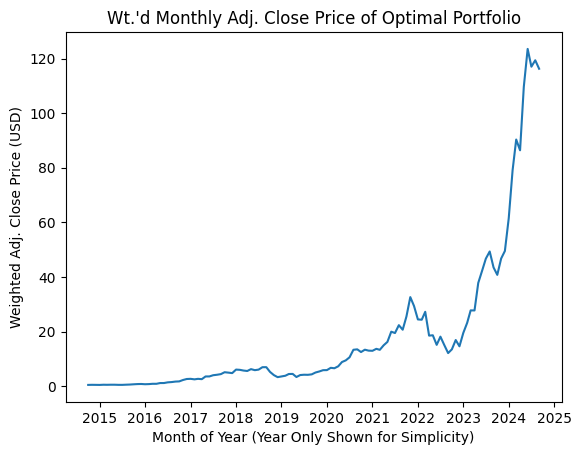

In [ ]:
# Increase from 3000 to 10000
totalIterations  = 10000     # Main Stopping criteria = the total number of iterations

# Decrease from 30 to 10
numPorfolios     = 10        # number of portfolios in swarm to simulate

# Run optimization again
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )


```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 67.6%
Annualized Expected Return:	 67.6%
Sharpe Ratio:			 0.98
Expected Return over 9.9 Years:  16712.8%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|    DHR |      100.0% |


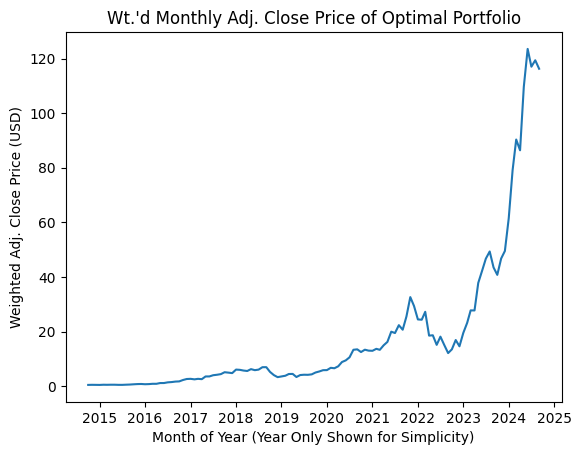

In [ ]:
# Change the evaluation to maximize Sharpe ratio
evalGoal         = 'sharpe'    # Minimze 'risk' or maximize 'sharpe'

# Reset recent change of iterations and the number of portfolios
totalIterations  = 3000      # Main Stopping criteria = the total number of iterations
numPorfolios     = 30        # number of portfolios in swarm to simulate

# Run optimization again
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )


```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 14.3%
Annualized Expected Return:	 18.0%
Sharpe Ratio:			 1.15
Expected Return over 9.9 Years:  518.3%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|   AAPL |        1.0% |
|   MSFT |        2.0% |
|   GOOG |        1.8% |
|  GOOGL |        2.2% |
|   AMZN |        1.8% |
|   TSLA |        1.2% |
|    JNJ |        1.9% |
|    UNH |        0.7% |
|   META |        0.4% |
|      V |        1.1% |
|   NVDA |        0.2% |
|    XOM |        1.1% |
|     PG |        1.0% |
|    WMT |        1.8% |
|    JPM |        2.6% |
|     MA |        0.6% |
|    LLY |        1.5% |
|     HD |        3.2% |
|    PFE |        2.8% |
|    CVX |        3.0% |
|    BAC |        2.3% |
|     KO |        1.8% |
|   ABBV |        1.2% |
|    MRK |        2.3% |
|    PEP |        2.5% |
|     VZ |        2.5% |
|    TMO |        1.2% |
|   COST |        3.

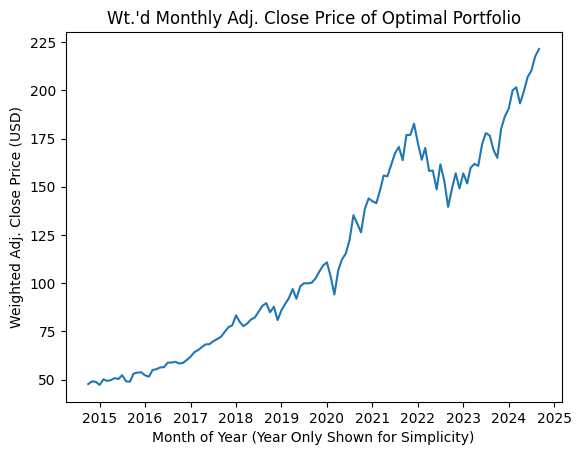

In [ ]:
# Change the the neighborhood operator to global best (from local best)
method = 'global'

# Reset recent change of sharpe ratio
evalGoal = 'risk'    # Minimize 'risk' or maximize 'sharpe'

# Run optimization again
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )


```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 10.5%
Annualized Expected Return:	 16.1%
Sharpe Ratio:			 1.38
Expected Return over 9.9 Years:  437.8%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|   MSFT |        0.8% |
|    UNH |        6.8% |
|    WMT |        6.3% |
|     MA |        0.8% |
|    PFE |        1.3% |
|   ABBV |        8.5% |
|    PEP |        4.7% |
|     VZ |        1.3% |
|    TMO |        3.6% |
|   AVGO |        9.1% |
|   CSCO |       17.0% |
|    BMY |       12.8% |
|   INTC |        7.6% |
|    WFC |       10.2% |
|    TXN |        3.2% |
|    RTX |        6.0% |


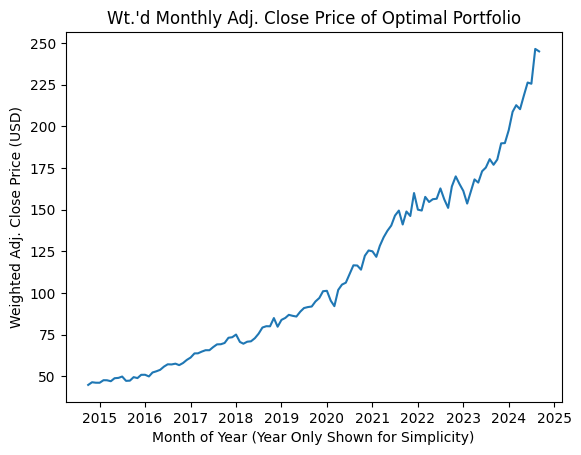

In [ ]:
# Increase from 3000 to 10000
totalIterations  = 10000     # Main Stopping criteria = the total number of iterations

# Increase from 30 to 100
numPorfolios     = 100        # number of portfolios in swarm to simulate

# Reset recent change of neighborhood operator back to local best
method = 'local'

# Run optimization again
gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )


```
Key Summary Statistics -----------------
Global Best Annualized Risk:	 10.5%
Annualized Expected Return:	 16.2%
Sharpe Ratio:			 1.40
Expected Return over 9.9 Years:  445.0%

Global best weights in each stock (Only includes stocks to invest in):
```
| Ticker | Opt. Weight |
|--------|-------------|
|   MSFT |        0.9% |
|    UNH |        6.8% |
|    WMT |        6.6% |
|     MA |        0.9% |
|   ABBV |        8.3% |
|    PEP |        4.0% |
|     VZ |        1.8% |
|    TMO |        2.7% |
|   AVGO |        9.3% |
|   CSCO |       17.1% |
|    BMY |       13.0% |
|   INTC |        7.5% |
|    WFC |       10.3% |
|    TXN |        1.7% |
|    RTX |        6.0% |
|   QCOM |        3.1% |


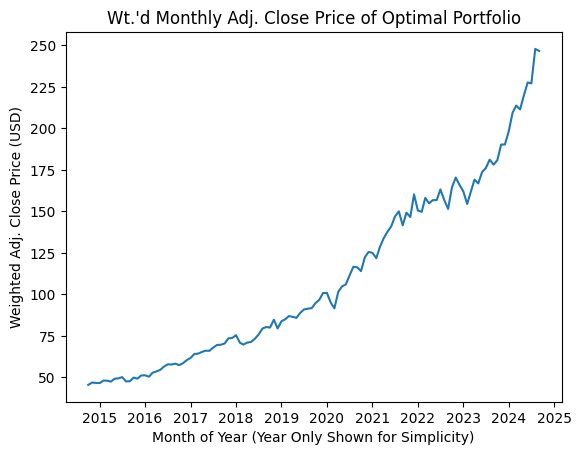

In [ ]:
# Increase from 3000 to 10000
totalIterations  = 10000     # Main Stopping criteria = the total number of iterations

# Increase from 30 to 200
numPorfolios     = 200        # number of portfolios in swarm to simulate

gBestSolution = optimizePortfolioPSO(
                    evalGoal        = evalGoal,        # Minimize 'risk' or maximize 'sharpe'
                    minDesiredReturn= minDesiredReturn,# The minimum desired return
                    numPorfolios    = numPorfolios,    # number of portfolios in swarm to simulate
                    totalIterations = totalIterations, # Main Stopping criteria = the total number of iterations
                    method          = method,          # 'local' or 'global' best function name
                    StockTickers    = StockTickers     # The stock tickers
                    )

# Kesimpulan

Berdasarkan grafik yang menampilkan harga penutupan tertimbang bulanan dari portofolio optimal pada periode 2015 hingga 2025, terdapat beberapa poin kesimpulan utama yang dapat diambil:

1. Tren kenaikan yang konsisten: Sejak 2015 hingga 2025, harga penutupan
tertimbang dari portofolio optimal menunjukkan tren naik yang signifikan. Ini menunjukkan kinerja yang kuat dan berkelanjutan dari portofolio tersebut.

2. Peningkatan yang tajam setelah 2020: Meskipun tren kenaikan terlihat konsisten, terdapat peningkatan yang lebih tajam setelah tahun 2020. Hal ini dapat disebabkan oleh faktor eksternal seperti perubahan kondisi pasar atau performa kuat dari aset-aset dalam portofolio.

3. Volatilitas ringan: Walaupun secara umum harga meningkat, terdapat beberapa periode fluktuasi kecil di sekitar 2021 hingga 2023. Ini menunjukkan adanya volatilitas dalam jangka pendek, tetapi tidak memengaruhi tren naik jangka panjang.

4. Nilai portofolio optimal: Nilai penutupan tertimbang mencapai sekitar 225 USD pada tahun 2024, menunjukkan pertumbuhan signifikan dari sekitar 50 USD di awal periode (2015). Kenaikan ini menandakan bahwa portofolio optimal telah menghasilkan keuntungan yang substansial.

Secara keseluruhan, portofolio optimal ini menunjukkan performa yang sangat positif, terutama dalam beberapa tahun terakhir. Ini bisa menarik bagi investor yang mencari pertumbuhan jangka panjang. Namun, volatilitas kecil pada beberapa periode tetap perlu diperhatikan sebagai bagian dari risiko investasi.